In [1]:
#Project: statistical analysis of real estate 

In [2]:
'''the rent ratio is median home price divided by 
annual median rent in the same market.
we have the following tasks:
1.extract data from targeted websites, focusing on
the price per squaremeter for both buying and 
renting.
website: https://esf.fang.com/
https://zu.fang.com/
2.describe your data, while pointing out the 
outliers
3.print the bar plot to median price(A)
rent ratio（B） of each block.'''


'the rent ratio is median home price divided by \nannual median rent in the same market.\nwe have the following tasks:\n1.extract data from targeted websites, focusing on\nthe price per squaremeter for both buying and \nrenting.\nwebsite: https://esf.fang.com/\nhttps://zu.fang.com/\n2.describe your data, while pointing out the \noutliers\n3.print the bar plot to median price(A)\nrent ratio（B） of each block.'

In [3]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service

# 方法1：如果驱动已在PATH中
driver = webdriver.Edge()

# 方法2：如果驱动在自定义路径（需替换为你的实际路径）
# service = Service(executable_path=r"D:\drivers\msedgedriver.exe")
# driver = webdriver.Edge(service=service)

# 打开百度验证
driver.get("https://www.baidu.com")
print(driver.title)  # 输出页面标题
driver.quit()
#经测试，配置完成

百度一下，你就知道


In [4]:
from selenium import webdriver
from selenium.webdriver.edge.service import\
Service
from selenium.webdriver.common.by import By
import time
import pandas as pd
import random
time1=time.time()
'''为避免频繁请求，可以尝试利用time实现随机等待
time.sleep(random.uniform(1,3))'''
browser=webdriver.Edge()
#房源地是我家附近
browser.get("https://gz.esf.fang.com/house-a076/j290-k2140/")
'''有必要把窗口最大化吗
driver.maximize_window()'''
buy_price=[]
blocks=[]
for i in range(30):
    buy_price1=browser.find_elements(By.XPATH,'//dd[@class="price_right"]/span[not(@class="red")]')
    for price in buy_price1:
        price1=price.text
        buy_price.append(price1)
    next_page=browser.find_element(By.XPATH,'//*[@class="last"]')
    next_page.click()
    #time.sleep(random.uniform(1,2))
print(buy_price)
browser.quit()
time2=time.time()
print(f'用时为{time2-time1}s')


['25338元/㎡', '24710元/㎡', '35714元/㎡', '35357元/㎡', '14732元/㎡', '25107元/㎡', '7142元/㎡', '24793元/㎡', '35714元/㎡', '35000元/㎡', '37999元/㎡', '28191元/㎡', '30510元/㎡', '29690元/㎡', '29411元/㎡', '34928元/㎡', '35000元/㎡', '34907元/㎡', '29923元/㎡', '29779元/㎡', '49566元/㎡', '25196元/㎡', '12931元/㎡', '26740元/㎡', '48000元/㎡', '16936元/㎡', '29912元/㎡', '11595元/㎡', '33127元/㎡', '41071元/㎡', '25210元/㎡', '42795元/㎡', '29850元/㎡', '39285元/㎡', '25833元/㎡', '16700元/㎡', '25208元/㎡', '29832元/㎡', '10400元/㎡', '14591元/㎡', '34130元/㎡', '34928元/㎡', '14571元/㎡', '47524元/㎡', '20000元/㎡', '25384元/㎡', '22935元/㎡', '33692元/㎡', '21296元/㎡', '30004元/㎡', '20642元/㎡', '29473元/㎡', '28184元/㎡', '29807元/㎡', '18371元/㎡', '20000元/㎡', '27245元/㎡', '39215元/㎡', '42056元/㎡', '26044元/㎡', '31505元/㎡', '26044元/㎡', '39215元/㎡', '20000元/㎡', '23704元/㎡', '22500元/㎡', '17263元/㎡', '22960元/㎡', '18111元/㎡', '27966元/㎡', '37025元/㎡', '28713元/㎡', '16097元/㎡', '24817元/㎡', '24677元/㎡', '25000元/㎡', '20828元/㎡', '25913元/㎡', '22764元/㎡', '16288元/㎡', '19900元/㎡', '24529元/㎡', '19148元/㎡', '196

In [5]:
import math
import statistics

print(len(buy_price))
#清洗数据，按照四分位距法计算
average=[]
def clean(target):
    final=[]
    buy_prices=[]
    outliers_buy=[]
    for j in target:
        num=j[:-3]
        num=int(num)
        final.append(num)
    final=sorted(final,reverse=False)
    
    Q1=final[math.floor(len(final)/4)]
    Q2=final[-math.floor(len(final)/4)]
    IQR=final[len(final)-1]-final[0]
    print([Q1,Q2,IQR])
    for m in final:
        if m>=Q1-1.5*IQR and m<=Q2+1.5*IQR:
            buy_prices.append(m)
        else:
            outliers_buy.append(m)
    buy_average=statistics.mean(final) 
    print(f"数据清洗完成，异常数据为{outliers_buy},共{len(outliers_buy)}个")
    print(f"房产平均价格为{buy_average}")
    average.append(buy_average)
clean(buy_price)
time3=time.time()
print(f'用时为{time3-time2}s')

1800
[21491, 36363, 71124]
数据清洗完成，异常数据为[],共0个
房产平均价格为29809.9
用时为0.010404586791992188s


In [6]:
browser=webdriver.Edge()
browser.get("https://gz.zu.fang.com/house-a076/z62/")
rent_price=[]
blocks=[]
for i in range(30):
    rent_price1=browser.find_elements(By.XPATH,'//*[@class="mt5 alingC"]')
    for price in rent_price1:
        price1=price.text
        rent_price.append(price1)
    next_page=browser.find_element(By.XPATH,'//*[@class="fanye"]')
    next_page.click()
    #time.sleep(random.uniform(1,2))
print(rent_price)
browser.quit()
clean(rent_price)

time4=time.time()

['28000元/月', '10800元/月', '15000元/月', '5000元/月', '6500元/月', '3800元/月', '3800元/月', '10000元/月', '4500元/月', '4000元/月', '2500元/月', '3300元/月', '3000元/月', '5000元/月', '4800元/月', '5000元/月', '5000元/月', '5300元/月', '5000元/月', '4500元/月', '3300元/月', '7000元/月', '4700元/月', '5000元/月', '5500元/月', '11500元/月', '5500元/月', '5300元/月', '3500元/月', '4200元/月', '5800元/月', '3200元/月', '3800元/月', '5000元/月', '3700元/月', '5200元/月', '5000元/月', '5000元/月', '1500元/月', '1500元/月', '5300元/月', '6500元/月', '5600元/月', '5000元/月', '6800元/月', '9500元/月', '5000元/月', '2800元/月', '7000元/月', '9000元/月', '26000元/月', '4500元/月', '5000元/月', '5800元/月', '5200元/月', '15000元/月', '5500元/月', '7800元/月', '2600元/月', '6800元/月', '1900元/月', '7800元/月', '26000元/月', '3800元/月', '5500元/月', '3800元/月', '4200元/月', '6500元/月', '4500元/月', '5000元/月', '9500元/月', '5800元/月', '13000元/月', '11800元/月', '8500元/月', '18000元/月', '4800元/月', '5800元/月', '2600元/月', '2800元/月', '2700元/月', '7800元/月', '2500元/月', '10500元/月', '7500元/月', '4600元/月', '3200元/月', '3700元/月', '3900元/月', '6500元/月

In [7]:
browser=webdriver.Edge()
browser.get("https://gz.esf.fang.com/house-a076/j290-k2140/")
area=[]
import re
for j in range(30):
    mianji=browser.find_elements(By.XPATH,'//p[@class="tel_shop"][contains(., "\u33A1")]')
    for mianji1 in mianji:  
        text = mianji1.text  
        match_result = re.search(r"(\d+)㎡", text) 
        if match_result:
            area_num = int(match_result.group(1))
            area.append(area_num)
        else:
            print(f"未在文本 '{text}' 中找到面积")

if len(area)>0:
    area_average=statistics.mean(area)
    print(area_average)
    ratio=area_average*average[0]/average[1]
    print(f'租售比为{ratio}')
else:
    print('false')



92.7
租售比为370.9425483806016


AttributeError: 'DataFrame' object has no attribute 'show'

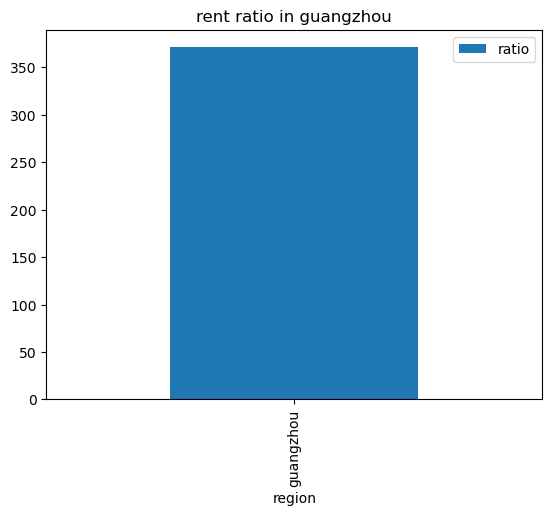

In [8]:
import pandas as pd
data={'region':['guangzhou'],'ratio':[ratio]}
df=pd.DataFrame(data)
df.plot.bar(x='region',y='ratio',title='rent ratio in guangzhou')
df.savefig('rent_ratio_guangzhou.png')